<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/CNN_mnist_Modeling_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.13.0'

# MNIST Data_Set Load

In [5]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Data Preprocessing

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [8]:
X_train = X_train.reshape((60000, 28,28,1))
X_test = X_test.reshape((10000, 28,28,1))

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

# MNIST Keras Modeling

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters = 8, kernel_size = (3,3),
                        strides = (1,1), padding = 'valid',
                        activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 16, kernel_size = (3,3),
                        strides = (1,1), padding = 'valid',
                        activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3),
                        strides = (1,1), padding = 'valid',
                        activation = 'relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
Total params: 5888 (23.00 KB)
Trainable params: 5888 (23

In [13]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [16]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 15s 9ms/step - loss: 0.5387 - accuracy: 0.8323 - val_loss: 0.1534 - val_accuracy: 0.9531
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1728 - accuracy: 0.9452 - val_loss: 0.1014 - val_accuracy: 0.9703
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1261 - accuracy: 0.9597 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1035 - accuracy: 0.9672 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0942 - accuracy: 0.9705 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0837 - accuracy: 0.9736 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.0563 - val_accuracy: 0.98

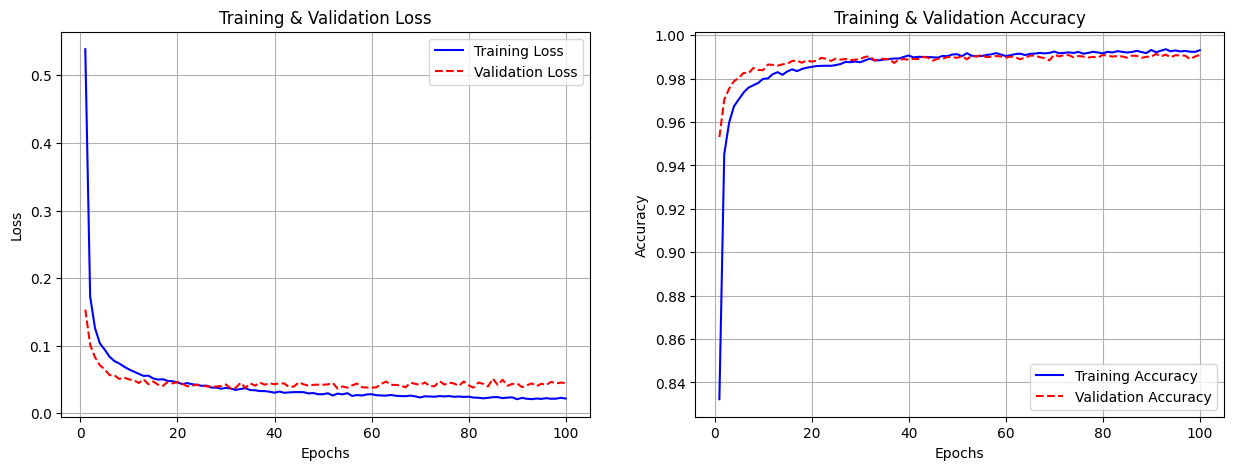

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.03096
Accuracy = 0.99210
